In [ ]:
# mount Google Drive to the Colab Virtual Machine
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#say no to warnings!
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

### Work with images across numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,array_to_img,img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input,decode_predictions
from tensorflow.keras.backend import clear_session

In [ ]:
# Create a image with 3 channels
matrix = np.random.random([228, 228, 3])

In [ ]:
matrix.shape

(228, 228, 3)

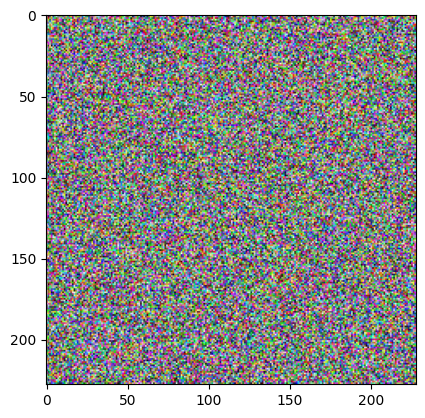

In [ ]:
plt.imshow(matrix);

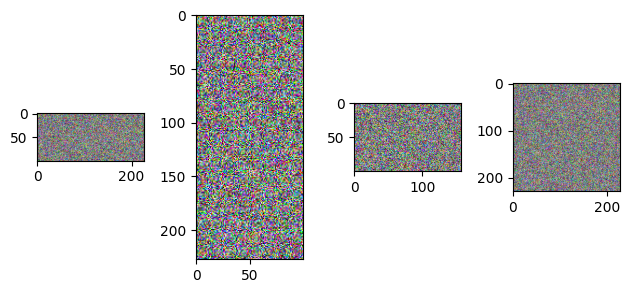

In [ ]:
# Example of resize
plt.subplot(1,4,1)
plt.imshow(matrix[:100]) # Only first 100 rows
plt.subplot(1,4,2)
plt.imshow(matrix[:, :100])  # Only first 100 columns
plt.subplot(1,4,3)
plt.imshow(matrix[70:170 , 70:270])  # Zoom at center
plt.subplot(1,4,4)
plt.imshow(matrix)  # Complete image
plt.tight_layout();

Downsampling is the reduction in spatial resolution while keeping the same dimensional. It is typically used to reduce the storage and/or transmission requirements of images.

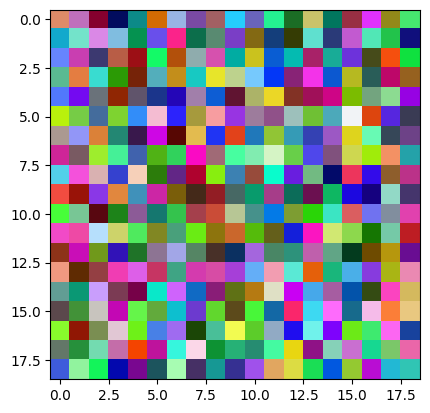

In [ ]:
# Apply the downsampling
plt.imshow(matrix[::12, ::12]);  # All rows and columns but taken one every 12 (12 is the spetp)

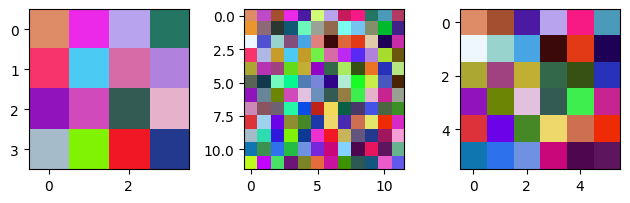

In [ ]:
# Example of downsampling
plt.subplot(1,3,1)
plt.imshow(matrix[::57, ::57]);
plt.subplot(1,3,2)
plt.imshow(matrix[::19, ::19]);
plt.subplot(1,3,3)
plt.imshow(matrix[::38, ::38])
plt.tight_layout();

In [ ]:
# Upload a image
image_cat = load_img("/content/drive/MyDrive/cat.jpg", target_size=(224, 224))
type(image_cat)

PIL.Image.Image

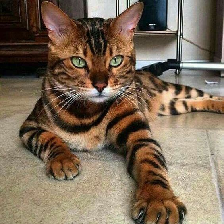

In [ ]:
image_cat

In [ ]:
# Transform the image into array
image_cat = img_to_array(image_cat)
type(image_cat)

numpy.ndarray

In [ ]:
image_cat.shape

(224, 224, 3)

In [ ]:
print("Max value:", image_cat.max(), "\nMin value:", image_cat.min())

Max value: 255.0 
Min value: 0.0


In [ ]:
# Transform it in values between 0 and 1
image_cat = image_cat/255
print("Max value:", image_cat.max(), "\nMin value:", image_cat.min())

Max value: 1.0 
Min value: 0.0


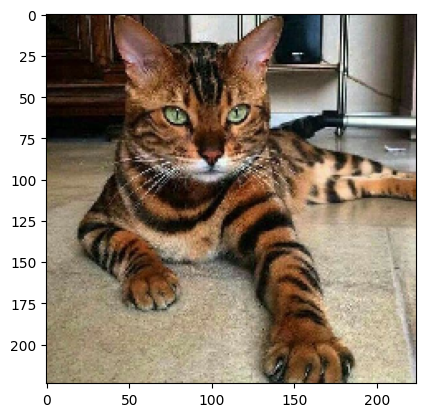

In [ ]:
plt.imshow(image_cat);

### Work with Convolutional Neural Network

In [ ]:
# See some Neural Networks models
[x for x in dir(tf.keras.applications) if not x.startswith("_")]

['ConvNeXtBase',
 'ConvNeXtLarge',
 'ConvNeXtSmall',
 'ConvNeXtTiny',
 'ConvNeXtXLarge',
 'DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 'convnext',
 'densenet',
 'efficientnet',
 'efficientnet_v2',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3',
 'nasnet',
 'resnet',
 'resnet50',
 'resnet_v2',
 'vgg16',
 'vgg19',
 'xception']

In [ ]:
# MobileNetV2 model
trained_model = tf.keras.applications.MobileNetV2()
trained_model.summary()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
# Number of layers in MobileNetV2 model
len(trained_model.layers)

156

In [ ]:
# Add the batch number (1 we have only one image) to be supplied as input to the model
batch_cat = np.expand_dims(image_cat, 0)
print(batch_cat.shape, image_cat.shape)

(1, 224, 224, 3) (224, 224, 3)


In [ ]:
# Use the model to classify the image
prediction = trained_model.predict(batch_cat)
prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(1, 1000)

In [ ]:
# Show the max value and the index (position) of this value
print(np.max(prediction[0]))
print(np.argmax(prediction[0]))

0.58339566
281


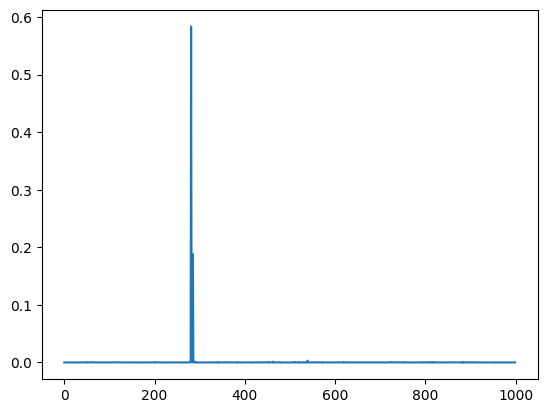

In [ ]:
# Show the values from 0 to 1000 of each category (Model trained on ImageNet that has 1000 categories)
plt.plot(prediction[0]);

In [ ]:
# Show the first 5 objects with the value of prediction
decode_predictions(prediction)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02123045', 'tabby', np.float32(0.58339566)),
  ('n02124075', 'Egyptian_cat', np.float32(0.18818401)),
  ('n02123159', 'tiger_cat', np.float32(0.10476729)),
  ('n03223299', 'doormat', np.float32(0.0032672295)),
  ('n02909870', 'bucket', np.float32(0.0013962839))]]

In [ ]:
# Create the function to use the a model to predict a image
def pretrained_prediction(model,filename):
    image = np.expand_dims(load_img(filename,target_size=(224,224,3)),0)
    plt.imshow(image[0])
    prediction = model.predict(preprocess_input(image))
    return decode_predictions(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02099601', 'golden_retriever', np.float32(0.8905378)),
  ('n02099712', 'Labrador_retriever', np.float32(0.03748982)),
  ('n02101556', 'clumber', np.float32(0.0044749314)),
  ('n02104029', 'kuvasz', np.float32(0.001962624)),
  ('n02111129', 'Leonberg', np.float32(0.0016692751))]]

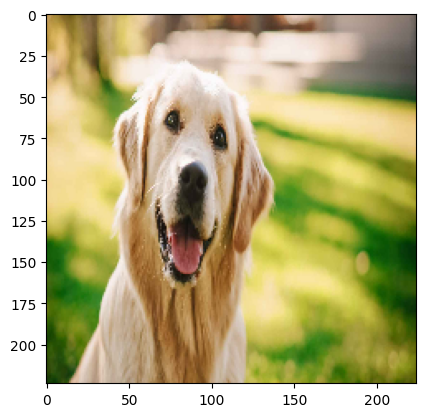

In [ ]:
# Dog image
pretrained_prediction(trained_model,'/content/drive/MyDrive/dog.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


[[('n02123045', 'tabby', np.float32(0.613295)),
  ('n02124075', 'Egyptian_cat', np.float32(0.11028303)),
  ('n02123159', 'tiger_cat', np.float32(0.10249995)),
  ('n03223299', 'doormat', np.float32(0.0025190827)),
  ('n02909870', 'bucket', np.float32(0.0023413931))]]

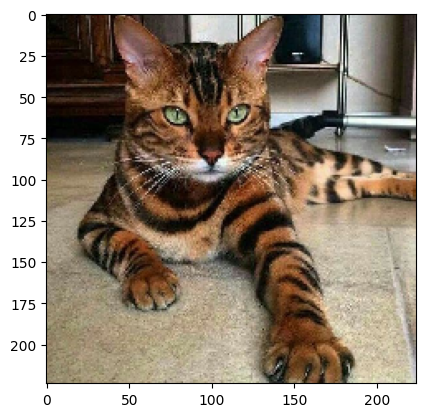

In [ ]:
# Cat image
pretrained_prediction(trained_model,'/content/drive/MyDrive/cat.jpg')

### CNN with CIFAR Dataset

In [ ]:
import pickle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Input, Conv2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
# Upload the dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
labels = ['airplane','automobile','bird','cat','deer','dog',\
          'frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


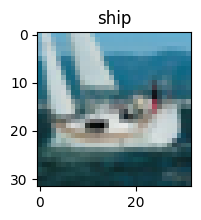

In [ ]:
plt.figure(figsize=(2,2))
# Show a image random
indx = np.random.choice(range(50000))
plt.imshow(x_train[indx])
plt.title(labels[y_train[indx][0]]);

In [ ]:
x_train.max()

np.uint8(255)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# Preprocessing (divide to 255)
x_train, x_test = x_train / 255.0, x_test / 255.0
# Apply flatten to collapsed into one line the values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

### Create AlexNet (Convolutional Neural Network)

In [ ]:
# Inizialize the weights with RandomNormal
w_init = tf.keras.initializers.RandomNormal(stddev=0.01)
# Create a Convolunional Neural Network similar to AlexNet
cnn1 = Sequential([
    InputLayer(input_shape=(32,32,3)),
    Conv2D(filters=96, kernel_size=(3,3), strides=(1,1),
           kernel_initializer=w_init, bias_initializer='zeros',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu',
           kernel_initializer=w_init, bias_initializer='ones',padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu',
           kernel_initializer=w_init, bias_initializer='zeros',padding="same"),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu',
           kernel_initializer=w_init, bias_initializer='ones',padding="same"),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu',
           kernel_initializer=w_init, bias_initializer='ones',padding="same"),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, kernel_initializer=w_init, bias_initializer='ones', activation='relu'),
    Dropout(0.5),
    Dense(4096, kernel_initializer=w_init, bias_initializer='ones', activation='relu'),
    Dropout(0.5),
    Dense(10, kernel_initializer=w_init, bias_initializer='zeros', activation='softmax')
])

In [ ]:
# Compile the model
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
%%time
hist1 = cnn1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1852s 1s/step - accuracy: 0.2689 - loss: 2.5468 - val_accuracy: 0.2519 - val_loss: 2.3284
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1871s 1s/step - accuracy: 0.4961 - loss: 1.4340 - val_accuracy: 0.5503 - val_loss: 1.2866
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1838s 1s/step - accuracy: 0.5772 - loss: 1.2376 - val_accuracy: 0.5751 - val_loss: 1.1997
CPU times: user 2h 14min 32s, sys: 18min 53s, total: 2h 33min 25s
Wall time: 1h 32min 42s


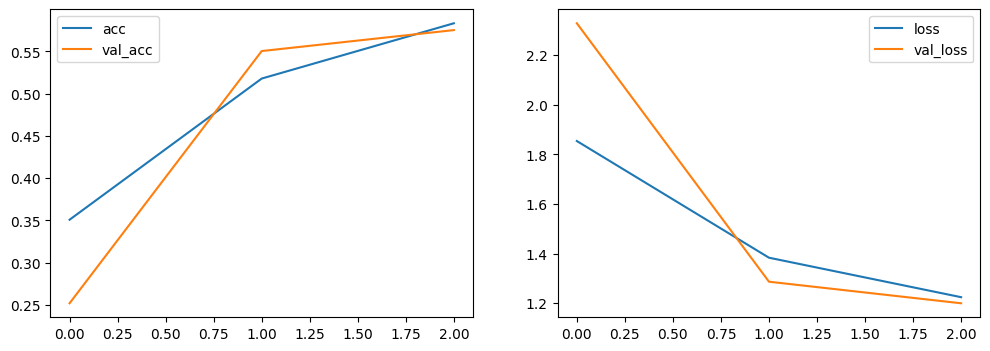

In [ ]:
# Show accuracy and loss in train and validation
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist1.history['accuracy'], label='acc')
plt.plot(hist1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist1.history['loss'], label='loss')
plt.plot(hist1.history['val_loss'], label='val_loss')
plt.legend()

### Build a better model

In [ ]:
# Modify AlexNet
cnn2 = Sequential([
    InputLayer(input_shape=(32,32,3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    #
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    #
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(),
    #
    Flatten(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')])

In [ ]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Data augmentation
batch_size = 32
# Create a data generator that will apply random transformations
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Create a generator that takes in input x_train and y_train and produce in outputs data in batches of 32
train_generator = data_generator.flow(x_train, y_train, batch_size)

# Calculates how many steps (batches) are needed in each epoch.
steps_per_epoch = x_train.shape[0] // batch_size

# Fit the model
hist2 = cnn2.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=25)

Epoch 1/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 333s 209ms/step - accuracy: 0.4064 - loss: 1.7305 - val_accuracy: 0.6060 - val_loss: 1.1081
Epoch 2/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6250 - loss: 1.1613 - val_accuracy: 0.6160 - val_loss: 1.0883
Epoch 3/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 350s 202ms/step - accuracy: 0.6139 - loss: 1.0854 - val_accuracy: 0.6250 - val_loss: 1.0674
Epoch 4/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7500 - loss: 0.9591 - val_accuracy: 0.6291 - val_loss: 1.0600
Epoch 5/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 366s 205ms/step - accuracy: 0.6731 - loss: 0.9318 - val_accuracy: 0.7197 - val_loss: 0.8076
Epoch 6/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7188 - loss: 0.7210 - val_accuracy: 0.7182 - val_loss: 0.8121
Epoch 7/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 329s 211ms/step - accuracy: 0.7064 - loss: 0.8399 - val_accuracy: 0.6849 - val_loss: 0.9221
Epoch 8/25
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.

In [ ]:
# Saves the trained weights of the model
#cnn2.save_weights('cnn2_weights')

# Saves the training history (loss and accuracy over epochs)
#pickle.dump(hist2.history,open('cnn2_history.pkl','wb'))

In [ ]:
# Load the trained weights inside a model
#cnn2.load_weights('cnn2_weights')

# Load the training history (loss and accuracy over epochs) previously saved
# hist2 = pickle.load(open('cnn2_history.pkl','rb'))

In [ ]:
# Evaluate the model
cnn2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7877 - loss: 0.6287


[0.6307953596115112, 0.7893999814987183]

In [ ]:
hist2.history

{'accuracy': [0.486871600151062,
  0.625,
  0.6329050660133362,
  0.75,
  0.6833573579788208,
  0.71875,
  0.7120757102966309,
  0.78125,
  0.732668936252594,
  0.71875,
  0.7501400709152222,
  0.75,
  0.7624079585075378,
  0.78125,
  0.7725744247436523,
  0.71875,
  0.7836815714836121,
  0.8125,
  0.7914265394210815,
  0.875,
  0.7961094975471497,
  0.875,
  0.8024335503578186,
  0.78125,
  0.8087176084518433],
 'loss': [1.4460692405700684,
  1.1613155603408813,
  1.0403897762298584,
  0.9590975046157837,
  0.9074645042419434,
  0.7209746837615967,
  0.8264541029930115,
  0.6003339290618896,
  0.768876314163208,
  0.9240108728408813,
  0.7237973213195801,
  0.7977536916732788,
  0.6873911619186401,
  0.5743247866630554,
  0.650716245174408,
  0.856919527053833,
  0.6274409890174866,
  0.5809884071350098,
  0.609373927116394,
  0.505537748336792,
  0.5889163017272949,
  0.3968689739704132,
  0.5701958537101746,
  0.595219612121582,
  0.5507848262786865],
 'val_accuracy': [0.60600000619

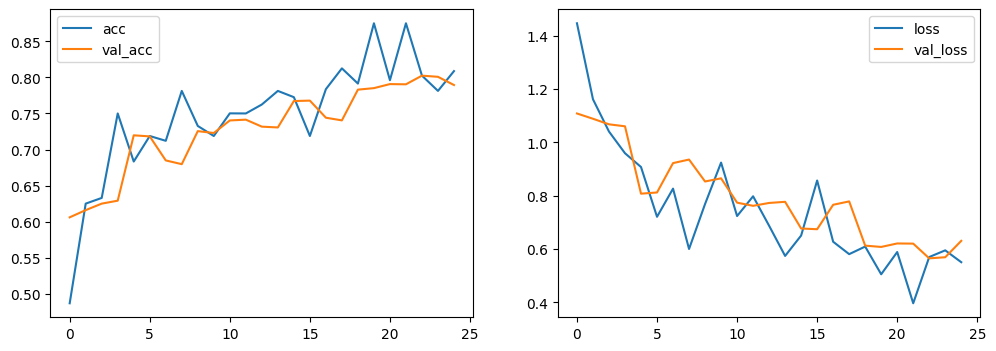

In [ ]:
# Show accuracy and loss in train and validation
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist2.history['accuracy'], label='acc')
plt.plot(hist2.history['val_accuracy'], label='val_acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist2.history['loss'], label='loss')
plt.plot(hist2.history['val_loss'], label='val_loss')
plt.legend();